# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


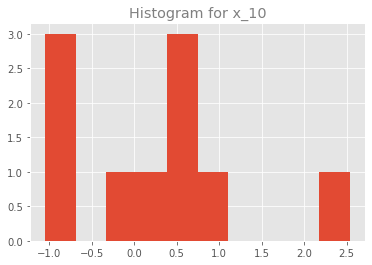

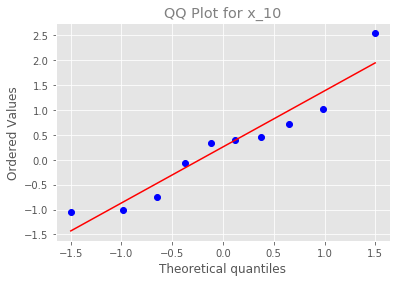

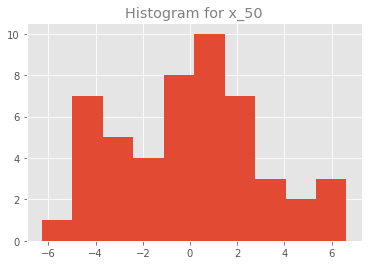

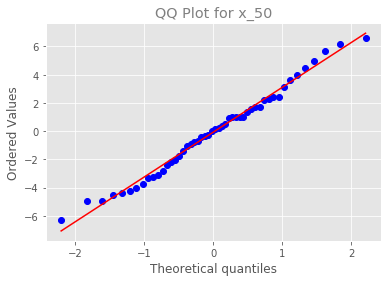

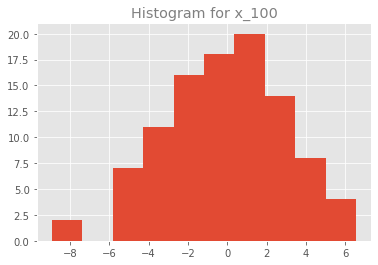

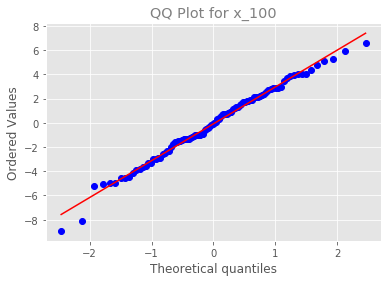

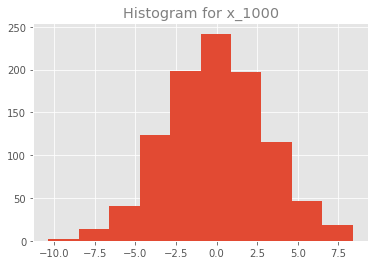

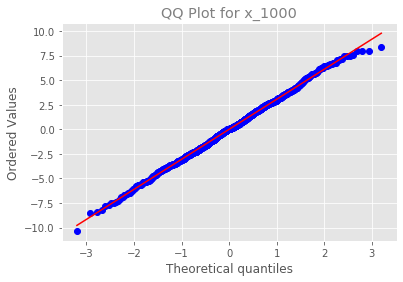

In [2]:
# Plot histograms and Q-Q plots for above datasets
data_sets = {"x_10": x_10, "x_50": x_50, "x_100": x_100, "x_1000": x_1000}
for key in data_sets:
    plt.hist(data_sets[key])
    plt.title("Histogram for {}".format(key), color="gray")
    plt.show()
    stats.probplot(data_sets[key], dist="norm", plot=plt)
    plt.title("QQ Plot for {}".format(key), color="gray")
    plt.show()

In [3]:
# Your comments here 
# These techniques seem pretty solid in checking for normality, though the histograms are not
# as useful when the sample size is very small. The QQ plot at sample size 10, however, was fairly
# clear even at the smallest sample size.
# The QQ plots appear to be a superior visualization for normality

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

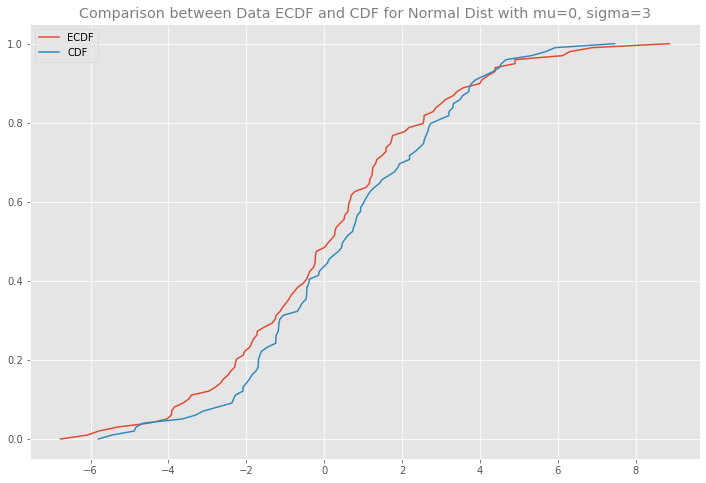

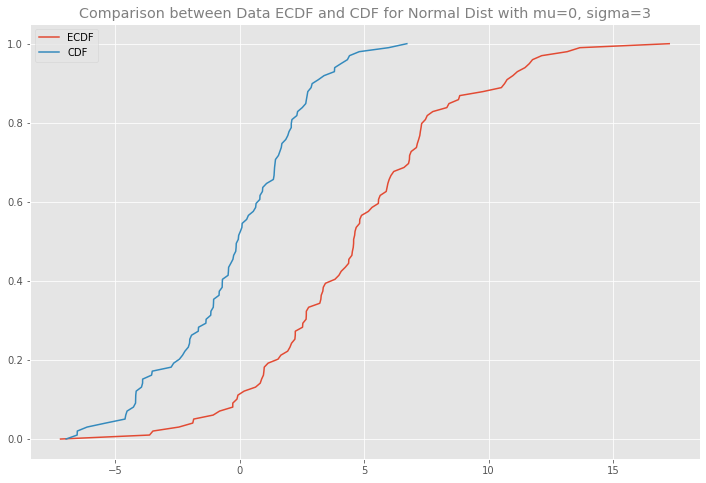

In [32]:
# You code here 

def ks_plot(data):
    fig = plt.figure(figsize=(12,8))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data)))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data)
                                                                                 ))
    plt.title("Comparison between Data ECDF and CDF for Normal Dist with mu=0, sigma=3", 
             color='gray')
    plt.legend(['ECDF', 'CDF'])
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

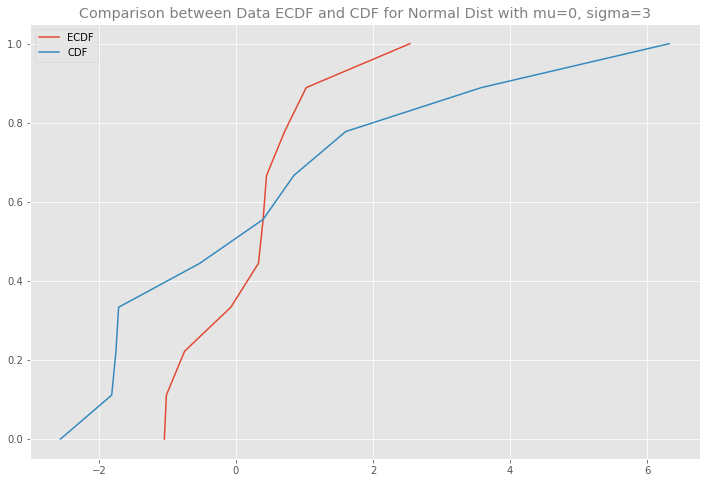

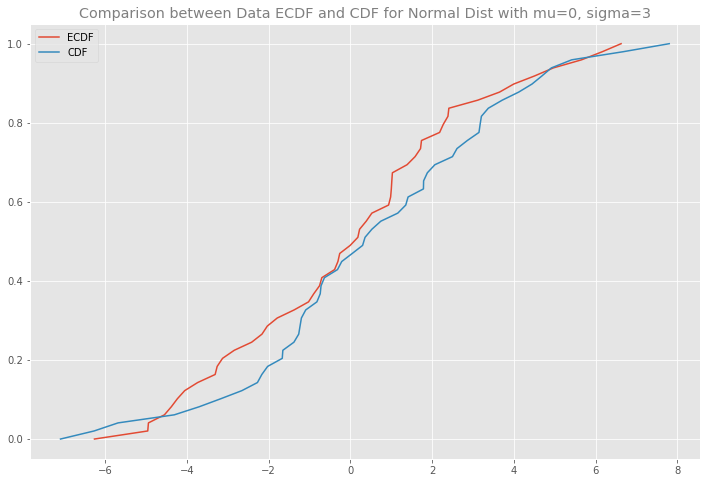

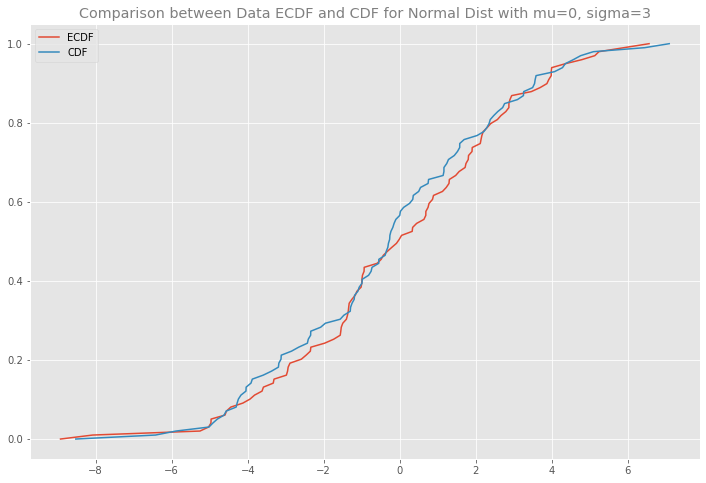

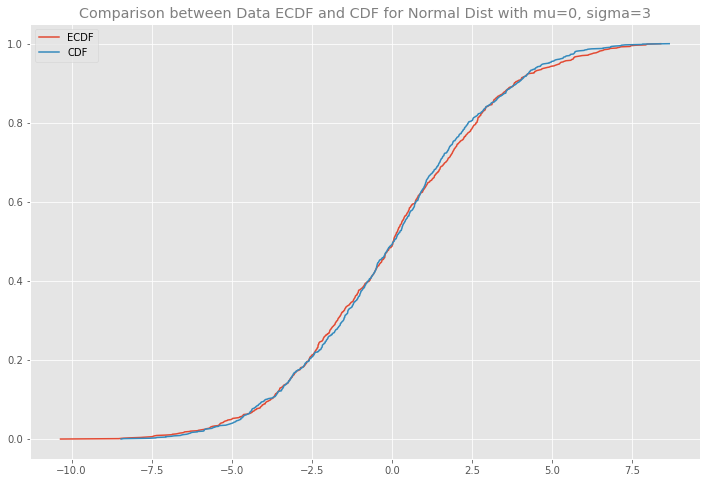

In [35]:
for key in data_sets:
    ks_plot(data_sets[key])

In [ ]:
# This type of comparison becomes much more accurate at larger sample sizes
# The smallest sample size does not look like it is from the same population, even though it is

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [46]:
# Perform K-S test 

# Your code here 
for key in data_sets:
    print(stats.kstest(data_sets[key], 
                       cdf='norm', 
                       N=len(data_sets[key]), 
                       alternative='two-sided',
                       args=(0, 3), 
                       mode='approx'))
# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.36399358274788374, pvalue=0.10775034664503598)
KstestResult(statistic=0.07170066173551173, pvalue=0.9592903156249424)
KstestResult(statistic=0.06238168718599629, pvalue=0.8312653203044429)
KstestResult(statistic=0.020092151291081772, pvalue=0.8142842345210591)


In [ ]:
# Your comments here 
# I can see that the p-value increased from the first dataset to the second, which is probably
# due to the very small sample size of the first dataset. Even the first dataset, however, 
# did not have a p-value < 0.05, meaning the null hypothesis would not have been rejected anyways.
# From there, it seems that the p-value decreased and stayed pretty stable, I believe this may be
# due to the increased sample size making small deviations more heavily penalized

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [55]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution
print(stats.kstest(x_uni, cdf='uniform', N=len(x_uni), alternative='two-sided', mode='approx'))
print(stats.kstest(x_uni, cdf='norm', N=len(x_uni), alternative='two-sided', mode='approx'))
# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.020356646277497226, pvalue=0.8016491503027462)
KstestResult(statistic=0.5008871159041248, pvalue=1.404117545468329e-232)


In [ ]:
# Your comments here 
# The null hypothesis would not have been rejected in the test against the uniform distribution,
# which is appropriate since the sample was drawn from a uniform distribution randomly.
# The null hypothesis would have been rejected in the second test against the normal distribution,
# which is also appropriate since the sample is not normal and was not sample from a normal
# distribution.

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

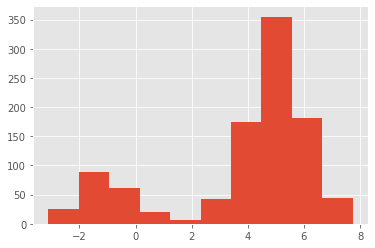

In [78]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.2 * N)), np.random.normal(5, 1, int(0.8 * N))))
plt.hist(x_1000_bi);

In [79]:
x_1000.shape

(1000,)

In [80]:
x_1000_bi.shape

(1000,)

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

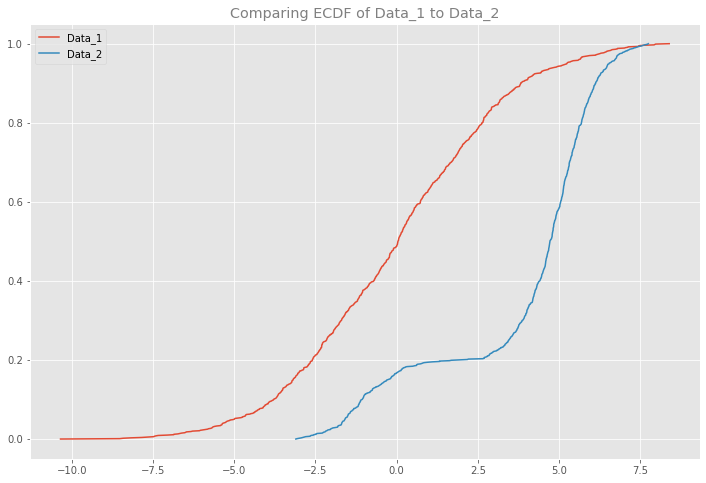

In [81]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    plt.figure(figsize=(12,8))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1)))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2)))
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing ECDF of Data_1 to Data_2', color='gray')

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi)


In [82]:
# You comments here 
# Using this visual K-S test, it appears clear that the two samples are 
# not from the same population


Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [83]:
# Your code here
print(stats.ks_2samp(x_1000, x_1000_bi, alternative='two-sided'))
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.631, pvalue=4.635561811121796e-187)


In [ ]:
# Your comments here 
# According to this 2 Sample KS test, the null hypothesis that x_1000 and x_1000_bi are from 
# identical populations can be rejected, and the alternative hypothesis that they come from 
# different populations is supported. This is accurate, since they were not sampled from
# identical populations.

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 